In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, jaccard_score, f1_score
import seaborn as sns

In [2]:
# Download data
# !wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

- LogisticRegression
- confusion_matrix

In [3]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape

(200, 28)

In [5]:
df['churn'].unique()

array([1., 0.])

In [6]:
X = df.drop(['churn'], axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                    random_state=42)

In [7]:
# Logistic Regression
log_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = log_model.predict(X_test)

In [8]:
# Evaluation
accuracy = accuracy_score(y_test, yhat)
print("Doğruluk:", accuracy)

Doğruluk: 0.7


In [9]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        45
         1.0       0.40      0.40      0.40        15

    accuracy                           0.70        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.70      0.70      0.70        60



In [10]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(cnf_matrix)

[[36  9]
 [ 9  6]]


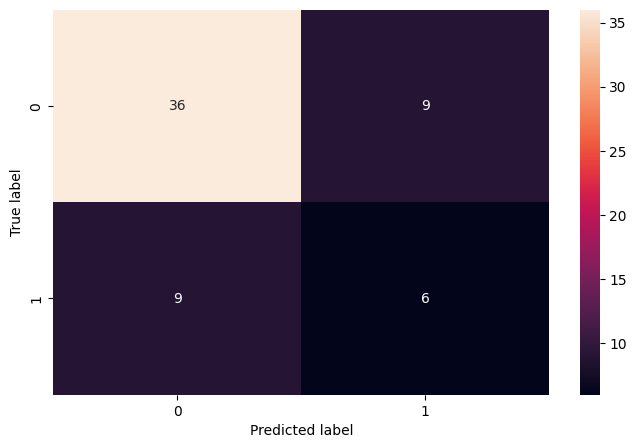

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
TP = cnf_matrix[1][1]
TN = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 6
True Negatives: 36
False Positives: 9
False Negatives: 9


In [13]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Doğruluk:", accuracy)

precision = TP / (TP + FP)
print("Hassasiyet:", precision)

recall = TP / (TP + FN)
print("Duyarlılık:", recall)

f1_score_result = 2 * precision * recall / (precision + recall)
print("F1 Skoru:", f1_score_result)

Doğruluk: 0.7
Hassasiyet: 0.4
Duyarlılık: 0.4
F1 Skoru: 0.4000000000000001


In [14]:
# Evaluation
print("Log Loss:", log_loss(y_test, yhat))
print("Jaccard:", jaccard_score(y_test, yhat))
print("F1 Score:", f1_score(y_test, yhat))

Log Loss: 10.813096016735146
Jaccard: 0.25
F1 Score: 0.4000000000000001
